In [ ]:
# using dataframes stored in /dfs, visualize connectivity as a heatmap

In [ ]:
# import packages
import pandas as pd
import numpy as np

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import cmocean

/Users/ellenlesser/Desktop/code/Lesser_eLife_2025/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# open postsynaptic connectivity table of left admn sensory neurons
full_df = pd.read_pickle('dfs/sn_connectivity.pkl')
full_df.head()

,id,created,superceded_id,valid,score,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,pre_pt_position,post_pt_position
0,42130502,2022-11-17 14:28:59.843347+00:00,NaN,t,15,72835979886907962,648518346488448078,72835979886902776,648518346475073189,"[24543, 130783, 736]","[24571, 130783, 737]"
1,42130504,2022-11-17 14:28:59.843347+00:00,NaN,t,33,72906348631059251,648518346480864602,72835979886889926,648518346491587270,"[24597, 130805, 734]","[24575, 130795, 734]"
2,3803893,2022-11-17 14:28:59.843347+00:00,NaN,t,45,73117799534815300,648518346502391366,73117799534818680,648518346496198668,"[31479, 140871, 2812]","[31459, 140893, 2812]"
3,3803897,2022-11-17 14:28:59.843347+00:00,NaN,t,72,73117799534637778,648518346488758877,73117799534635382,648518346496198668,"[31437, 140481, 2744]","[31467, 140495, 2743]"
4,9188821,2022-11-17 14:28:59.843347+00:00,NaN,t,124,72765405856699418,648518346478162157,72765405856692115,648518346496198668,"[21851, 124725, 2391]","[21879, 124703, 2391]"


In [43]:
# limit to connections with five synapses
# long - 2 min 12 sec

# function from tuthill-lab/Lesser_Azevedo_2023
def group_and_count_inputs(df, thresh):

    # count the number of synapses between pairs of pre and post synaptic inputs
    syn_in_conn=df.groupby(['pre_pt_root_id','post_pt_root_id']).transform(len)['id']
    # save this result in a new column and reorder the index
    df['syn_in_conn']=syn_in_conn
    df = df[['id', 'pre_pt_root_id','post_pt_root_id','score','syn_in_conn']].sort_values('syn_in_conn', ascending=False).reset_index()

    # Filter out small synapses between pairs of neurons and now print the shape
    df = df[df['syn_in_conn']>=thresh]
    # print(df.shape)
    return df

df = group_and_count_inputs(full_df,thresh=5)

In [44]:
# convert to an adjacency matrix
adj = pd.crosstab(df.pre_pt_root_id,df.post_pt_root_id).reset_index()
adj

post_pt_root_id,pre_pt_root_id,648518346342221942,648518346342697252,648518346343366314,648518346343481009,648518346343897574,648518346344121060,648518346344573532,648518346345423031,648518346345464936,...,648518346524374021,648518346526162391,648518346526231767,648518346526264535,648518346526516439,648518346531278362,648518346531352090,648518346531534618,648518346531538970,648518346531610650
0,648518346465961520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,648518346467538439,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0
2,648518346470385918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,648518346472382217,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,648518346472435465,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,648518346515083079,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,648518346515403345,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,648518346517185573,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,648518346523995653,0,0,0,0,0,0,0,0,0,...,17,0,0,0,0,0,0,0,0,0


In [45]:
# Next, order everything according to how you want to plot it.
# presynaptic neurons by their postsynaptic similarity:
# postsynaptic similarity is according to clusters previously determine through cosine similarity and agglomerative clustering and saved as part of the sn table. 
# similarity is also derived in the similarity.ipynb file in this folder
# postsynaptic neurons will be ordered first by their cell class (motor, ascending, etc) and then by which "cluster" they get the most input from

In [46]:
# for ease later on, rename clusters e.g. cluster_1 should be cluster_01 so that it comes before cluster_02

number_dict = {
  "cluster_1": "cluster_01",
  "cluster_2": "cluster_02",
  "cluster_3": "cluster_03",
  "cluster_4": "cluster_04",
  "cluster_5": "cluster_05",
  "cluster_6": "cluster_06",
  "cluster_7": "cluster_07",
  "cluster_8": "cluster_08",
  "cluster_9": "cluster_09",
}

In [47]:
# to order the postsynaptic cells by cell class and amount of input from each cluster

# add a column for which cluster gives the most input

# create a dictionary of sensory neurons and the cluster they belong to
sn_table = pd.read_pickle('dfs/sn_table.pkl')
sn_table["classification_system"].replace(number_dict, inplace=True)
dict_sn_cluster = dict(zip(sn_table.pt_root_id, sn_table.classification_system))

# make a copy of the adjacency matrix to collapse into sensory clusters
adj_collapse = adj.copy()
adj_collapse.pre_pt_root_id = adj_collapse.pre_pt_root_id.map(dict_sn_cluster)
adj_collapse = adj_collapse.set_index('pre_pt_root_id', drop=True)
adj_collapse

# table of each postsynaptic neuron and its top cluster of input
post_max_df = pd.DataFrame(adj_collapse.groupby('pre_pt_root_id').sum().idxmax().rename_axis('post_root_id').reset_index(name='max_cluster'))
post_max_df = post_max_df.iloc[:-1,:]

# add a column for the sum
post_max_df['max_syn'] = adj_collapse.groupby('pre_pt_root_id').sum().max()[:-1].astype(int).to_list()

# rename post_class names to alphebatize easily...
class_dict = {
  "local": "c_intrinsic",
  "intrinsic": "c_intrinsic",
  "sensory": "b_sensory",
  "ascending": "d_ascending",
  "local_intersegmental": "c_intrinsic",
  "mn": "a_motor",
}

# add a column for cell type
post_table = pd.read_pickle('dfs/post_wing_table.pkl')
post_table["classification_system"].replace(class_dict, inplace=True)
dict_post_class = dict(zip(post_table.pt_root_id, post_table.classification_system))
post_max_df['post_class'] = post_max_df.post_root_id.map(dict_post_class)

# remove nan class neurons: this means that its a lesser partner, only plot those that have been proofread which accounts for >80% of total output
post_max_df = post_max_df.dropna(subset=['post_class'])

# create a list of ordered post_root_id: by max cluster, then max_syn, then post_class
post_order = post_max_df.sort_values(['post_class', 'max_cluster', 'max_syn'], ascending=[True, True, False]).iloc[3:,:].post_root_id.to_list() # removed the one descending, efferent, and unproofed neuron

adj_ordered = adj.set_index('pre_pt_root_id')[post_order]
adj_ordered['sn_cluster'] = adj_ordered.index.map(dict_sn_cluster)

/var/folders/kc/3ksx1s8x04xcd7r2v8zsqqtm0000gn/T/ipykernel_80936/221041523.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sn_table["classification_system"].replace(number_dict, inplace=True)
/var/folders/kc/3ksx1s8x04xcd7r2v8zsqqtm0000gn/T/ipykernel_80936/221041523.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

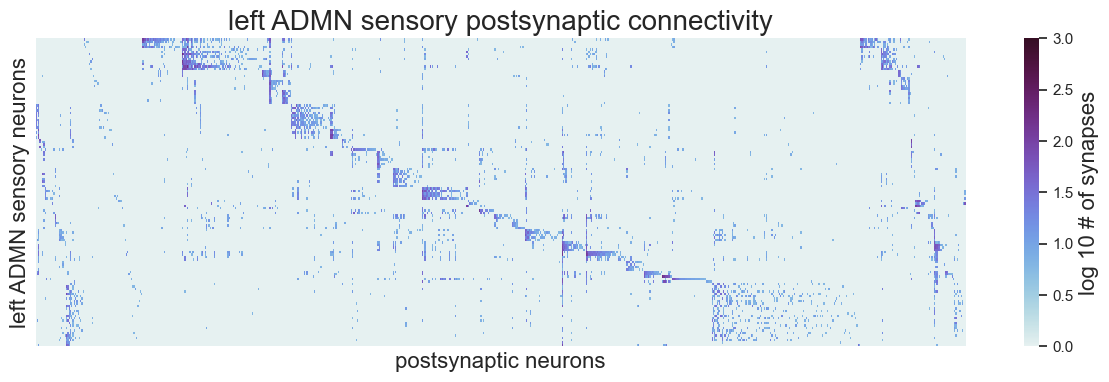

In [48]:
# visualize
source = adj_ordered.sort_values(by='sn_cluster')

fig = plt.figure(1, figsize = [15,4])
sns.set(font_scale= 1)
cmap = cmocean.cm.dense

log_values = np.log10(source.iloc[:,:-1] +1)
# sn_ids = source['sn_cluster'].to_list()
# post_ids = source.columns.to_list()
ax = sns.heatmap(log_values, vmin = 0, vmax = 3, xticklabels='', yticklabels='', cmap = cmap)

ax.xaxis.set_ticks_position('bottom')
cbar = ax.collections[0].colorbar
plt.title('left ADMN sensory postsynaptic connectivity', size = 20)
cbar.set_label(label = 'log 10 # of synapses', size=16)
plt.xlabel('postsynaptic neurons', size = 16)
plt.ylabel('left ADMN sensory neurons', size = 16)
# # plt.savefig('../leftadmn_connmat.eps', format='eps', bbox_inches='tight')

plt.show()

In [49]:
# number of neurons per class
post_max_df.post_class.value_counts()

post_class
c_intrinsic    565
d_ascending     81
b_sensory       46
a_motor         41
descending       1
efferent         1
Name: count, dtype: int64

In [ ]:
# number of synapses per class
post_max_df[['post_class','max_syn']].groupby('post_class').sum()

,max_syn
post_class,
a_motor,3417
b_sensory,421
c_intrinsic,25359
d_ascending,5228
descending,9
efferent,61
